# Exploring the data: Univariate
After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("univariate" means pertaining to one variable, rather than many). You’ll want to answer questions such as:

1. How many variables do I have?
- How many datapoints?
- Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
- Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
- Do I have missing data? If so, how much?
- How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.

## For two continuous variables:
- The scatterplot, which you’ve already encountered, represents the relationship between two continuous variables. For this sort of wide-scale dataset investigation, we can go a step further and create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.
- The correlation coefficient r is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).
- Look for: two-dimensional outliers that represent unusual combinations of values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [32]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [33]:
# Take a subset of the data to make plots clearer.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]
df_czch.head()

,cntry,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,CH,3.0,3.0,10.0,5.0,8.0,5.0
1,CH,6.0,5.0,7.0,5.0,9.0,3.0
2,CH,1.0,8.0,8.0,8.0,7.0,6.0
3,CH,4.0,6.0,6.0,7.0,10.0,6.0
4,CH,5.0,6.0,7.0,5.0,8.0,7.0


In [34]:
df_czch.count()

cntry      1431
tvtot      1425
ppltrst    1424
pplfair    1419
pplhlp     1425
happy      1416
sclmeet    1425
dtype: int64

In [35]:
# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
df_jittered.count()

tvtot      1388
ppltrst    1388
pplfair    1388
pplhlp     1388
happy      1388
sclmeet    1388
dtype: int64

In [36]:
df_jittered.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,3.0,3.0,10.0,5.0,8.0,5.0
1,6.0,5.0,7.0,5.0,9.0,3.0
2,1.0,8.0,8.0,8.0,7.0,6.0
3,4.0,6.0,6.0,7.0,10.0,6.0
4,5.0,6.0,7.0,5.0,8.0,7.0


In [37]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
print(jitter.head())
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)
df_jittered.head()

      tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
0 -0.017242  0.108822 -0.292882  0.217155 -0.229491 -0.171166
1 -0.192424 -0.223317  0.116917 -0.134068  0.256187  0.091250
2 -0.218742 -0.023364  0.037053  0.002993 -0.245907  0.247787
3 -0.093413  0.070998 -0.094542 -0.020982  0.246199 -0.232229
4  0.250830  0.101265 -0.084580  0.172663  0.091656  0.119818


,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,2.982758,3.108822,9.707118,5.217155,7.770509,4.828834
1,5.807576,4.776683,7.116917,4.865932,9.256187,3.091250
2,0.781258,7.976636,8.037053,8.002993,6.754093,6.247787
3,3.906587,6.070998,5.905458,6.979018,10.246199,5.767771
4,5.250830,6.101265,6.915420,5.172663,8.091656,7.119818


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


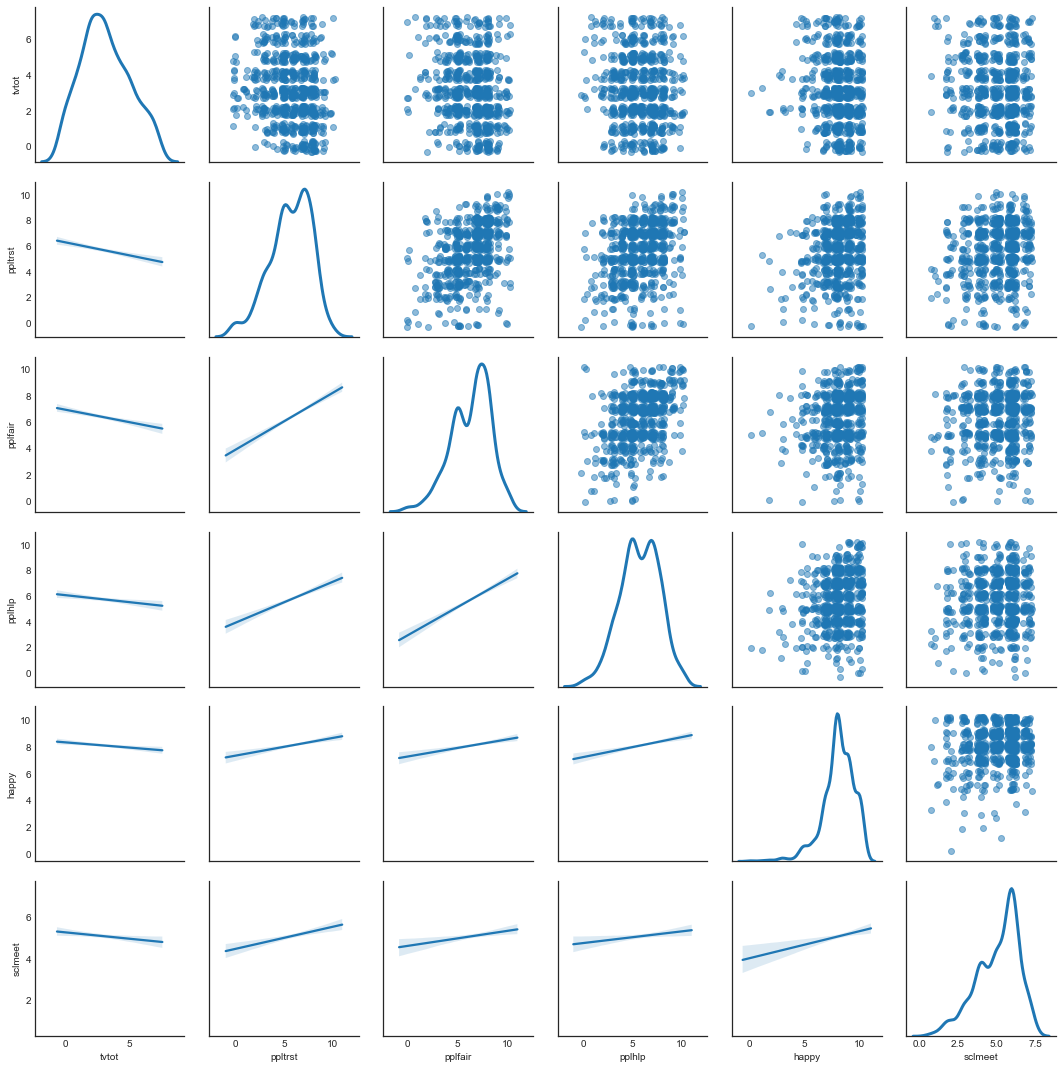

In [38]:

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

# ....

In [40]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry','partner']
]
df_2cat.head(10)

,cntry,partner
0,CH,1.0
1,CH,1.0
2,CH,2.0
3,CH,1.0
4,CH,1.0
5,CH,2.0
6,CH,1.0
7,CH,1.0
8,CH,2.0
9,CH,1.0


In [43]:
# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.head()

,cntry,partner,partner_cat
0,CH,1.0,None
1,CH,1.0,None
2,CH,2.0,None
3,CH,1.0,None
4,CH,1.0,None


In [47]:
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'

df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

In [48]:
df_2cat.head()

,cntry,partner,partner_cat
0,CH,1.0,Lives with partner
1,CH,1.0,Lives with partner
2,CH,2.0,Does not live with partner
3,CH,1.0,Lives with partner
4,CH,1.0,Lives with partner
